In [1]:
import h5py
import numpy as np
import torchvision.transforms.v2 as transforms
from scipy.signal import fftconvolve
import torch
from tqdm.auto import tqdm
from astropy.convolution import Gaussian2DKernel

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

In [2]:
hf = h5py.File("../../.data/Galaxy10_DECals.h5", "r")

In [3]:
hf["images"][0].shape

(256, 256, 3)

In [4]:
def numpy_to_tensor(image):
    return (torch.from_numpy(image).permute(2, 0, 1).float() / 255.0).to("cuda")

def tensor_to_numpy(im_tensor):
    im_tensor = torch.clamp(im_tensor * 255.0, 0, 255)
    return im_tensor.permute(1, 2, 0).byte().cpu().numpy()

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.GaussianNoise(mean=0.0, sigma=0.1, clip=True),
    transforms.ColorJitter(brightness=0.4, contrast=0, saturation=0.5, hue=0),
])

def augmented_class(hf: h5py._hl.files.File, class_index: int, target_count: int = 2600):
    
    labels = np.array(hf["ans"])
    images = hf["images"]

    original_indices = np.where(labels == class_index)[0]
    needed_count = target_count - len(original_indices)

    print(f"[Class {class_index}] Current: {len(original_indices)}, Adding: {needed_count}")

    augmented_images = np.zeros((needed_count, *images[0].shape))
    augmented_labels = np.ones(labels.shape) * class_index

    for i in tqdm(np.arange(needed_count), desc=f"Augmenting class {class_index}"):
        idx = rng.choice(original_indices)
        augmented_images[i] = tensor_to_numpy(
            transform(
                numpy_to_tensor(images[idx])
            )
        )

    return augmented_images, augmented_labels


def create_dataset(
    hf: h5py._hl.files.File,
    target_path: str,
    images: np.ndarray,
    labels: np.ndarray,
    data: np.ndarray=None
    ):
    
    if data is None:
        data = np.asarray(hf["images"])

    y = np.asarray(hf["ans"])

    with h5py.File(target_path, mode="w") as new_hf:
        new_hf.create_dataset("images", data=np.concatenate([data, images]))
        new_hf.create_dataset("ans", data=np.concatenate([y, labels]))

    return data, y

In [ ]:
augmented_im_3, augmented_label_3 = augmented_class(hf, 3)

[Class 3] Current: 2027, Adding: 573


Augmenting class 3:   0%|          | 0/573 [00:00<?, ?it/s]

In [ ]:
data = np.asarray(hf["images"])

In [ ]:
data, labels = create_dataset(hf=hf,
                              target_path="../../.data/Galaxy10_DECals_augmented.h5",
                              images=augmented_im_3,
                              labels=augmented_label_3,
                              data=data)

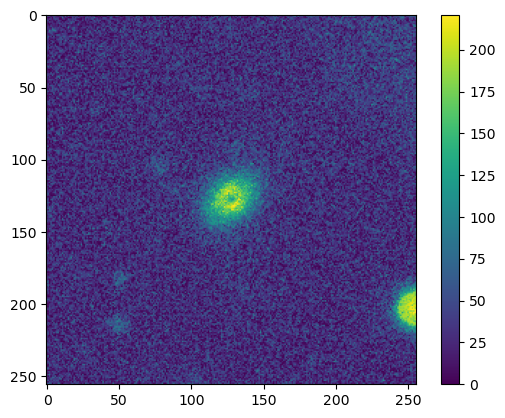

In [12]:
plt.imshow(augmented_im_3[np.random.randint(0,len(augmented_label_3))][..., 2])
plt.colorbar()

In [ ]:
#underrepresented = [0, 1, 3, 4, 5, 6, 8, 9]
#with h5py.File("../../.data/Galaxy10_DECals.h5", "r") as hf:
#    for cls in underrepresented:
#        add_augmented(hf, class_index=cls)

[Class 0] Current: 1081, Adding: 1519


Augmenting class 0:  97%|█████████▋| 1479/1519 [14:01<00:21,  1.87it/s]

In [7]:
plt.imshow(im_tensor_transformed.permute(1,2,0))

NameError: name 'im_tensor_transformed' is not defined

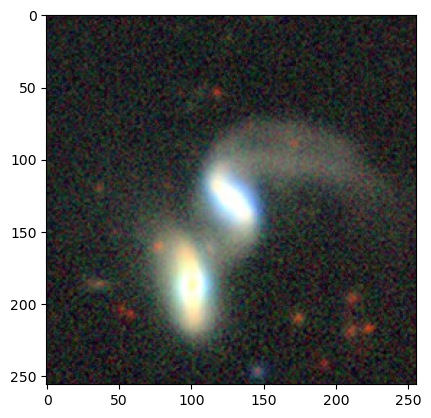

In [149]:
plt.imshow(im_tensor.permute(1,2,0))

In [31]:
img_center = 255 // 2
size = 192
l = img_center - size // 2
r = img_center + size // 2

In [13]:
channels = np.arange(3)
rng.shuffle(channels)

im[..., [0, 1, 2]] = im[..., channels]
rot_count = rng.integers(1, 3)
channels, rot_count

mod_img = np.rot90(im, rot_count)[l:r, l:r, :]
print(mod_img.shape)
#mod_img = np.transpose(
    [fftconvolve(mod_img[..., i], kernel, mode="valid") for i in range(0, 3)]
#)
mod_img = np.transpose([mod_img[..., i] / 255 for i in range(0, 3)])
mod_img.shape

IndentationError: unexpected indent (3947096074.py, line 11)

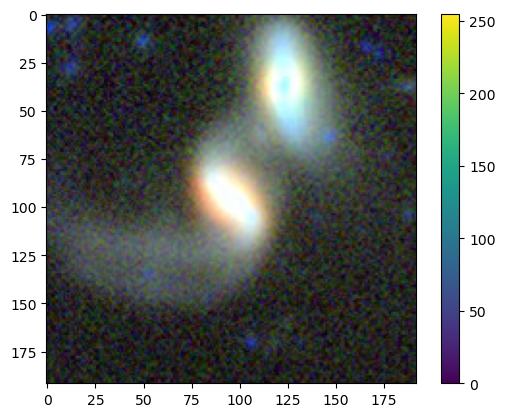

In [14]:
plt.imshow(mod_img)
plt.colorbar()

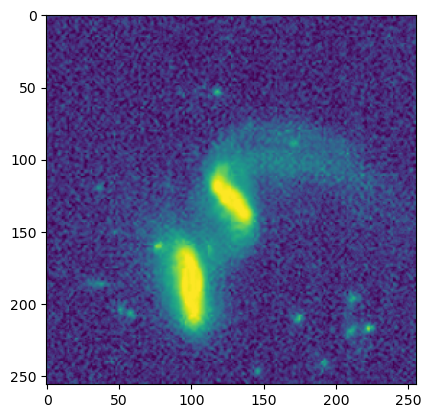

In [15]:
plt.imshow(im[..., 0])

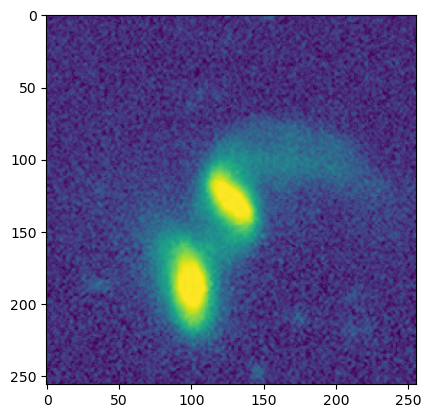

In [16]:
plt.imshow(im[..., 1])

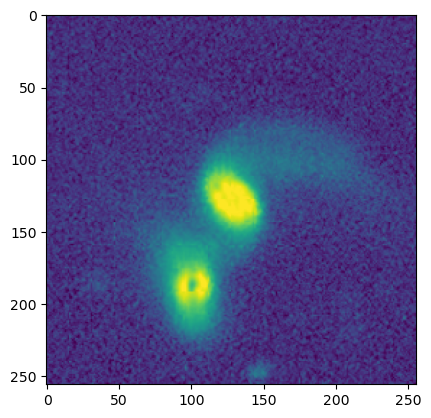

In [17]:
plt.imshow(im[..., 2])